# Mink CNN usage examples

## Imports

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.utils import shuffle
import tensorflow as tf
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mink import NeuralNetClassifier
from mink.layers import DenseLayer
from mink.layers import InputLayer
from mink.layers import Conv2DLayer
from mink.layers import DropoutLayer
from mink.layers import MaxPool2DLayer
from mink.nonlinearities import Softmax
from mink import updates

In [3]:
# experimental logging support
tf.app.flags.DEFINE_string('summaries_dir', '/home/vinh/work/mink/logs/', 'summaries directory')
if tf.gfile.Exists(tf.app.flags.FLAGS.summaries_dir):
    tf.gfile.DeleteRecursively(tf.app.flags.FLAGS.summaries_dir)
tf.gfile.MakeDirs(tf.app.flags.FLAGS.summaries_dir)
tf.gfile.Exists(tf.app.flags.FLAGS.summaries_dir)

True

## Data

In [4]:
df = pd.read_csv('../../data/mnist/train.csv')

In [5]:
y = df.pop('label')

In [6]:
X = (df.values / 255.).astype(np.float32)

In [7]:
X.shape

(42000, 784)

In [8]:
X = X.reshape(-1, 28, 28, 1)

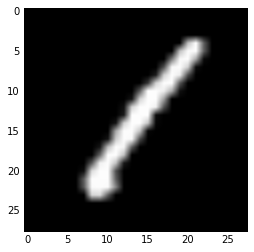

In [9]:
plt.imshow(X[0, :, :, 0], cmap='gray')

In [10]:
X, y = shuffle(X, y)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

## Train

In [12]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
session_kwargs = {'config': tf.ConfigProto(gpu_options=gpu_options)}

In [13]:
l = InputLayer()
l = Conv2DLayer(l)
l = MaxPool2DLayer(l)
l = Conv2DLayer(l, num_filters=64)
l = MaxPool2DLayer(l)
l = DenseLayer(l, num_units=64)
l = DenseLayer(l)

In [14]:
net = NeuralNetClassifier(
    layer=l, 
    max_epochs=20, 
    verbose=1, 
    update=updates.Momentum(learning_rate=0.02),
    session_kwargs=session_kwargs,
)

In [15]:
net.fit(X_train, y_train)

# Neural Network with 220234 learnable parameters

## Layer information

|   # | name      | size     |
|----:|:----------|:---------|
|   0 | input     | 28x28x1  |
|   1 | conv2d    | 28x28x32 |
|   2 | maxpool2d | 14x14x32 |
|   3 | conv2d    | 14x14x64 |
|   4 | maxpool2d | 7x7x64   |
|   5 | dense     | 64       |
|   6 | dense     | 10       |

|   epoch |   train loss |     dur |
|--------:|-------------:|--------:|
|       1 |      0.49637 | 2.36970 |
|       2 |      0.10350 | 2.15165 |
|       3 |      0.06770 | 2.16544 |
|       4 |      0.05209 | 2.19027 |
|       5 |      0.04427 | 2.25290 |
|       6 |      0.03779 | 2.14942 |
|       7 |      0.03029 | 2.13868 |
|       8 |      0.02550 | 2.13690 |
|       9 |      0.02213 | 2.14301 |
|      10 |      0.01975 | 2.12599 |
|      11 |      0.01743 | 2.12940 |
|      12 |      0.01563 | 2.13086 |
|      13 |      0.01391 | 2.12404 |
|      14 |      0.01227 | 2.12878 |
|      15 |      0.01119 | 2.13253 |
|      16 |      0

NeuralNetClassifier(batch_iterator_test=128, batch_iterator_train=128,
          encoder=LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
          layer=DenseLayer(W=GlorotUniform(c01b=False, gain=1.0), b=Constant(value=0.0),
      incoming=DenseLayer(W=GlorotUniform(c01b=False, gain=1.0), b=Constant(value=0.0),
      incoming=MaxPool2DLayer(incoming=Conv2DLayer(W=GlorotUniform(c01b=False, gain=1.0), b=Constant(value=0.0),
      filter_size=3,...nearity=None, num_units=64),
      make_logs=False, name=None, nonlinearity=Softmax(), num_units=10),
          max_epochs=20, objective=CrossEntropy(eps=1e-12),
          on_epoch_finished=(<mink.handlers.PrintTrainProgress object at 0x7fd14c5db278>,),
          on_training_started=(<mink.handlers.PrintLayerInfo object at 0x7fd14c61ad68>,),
          session_kwargs={'config': gpu_options {
  per_process_gpu_memory_fraction: 0.5
}
},
          update=Momentum(learning_rate=0.02, momentum=0.9), verbose=1)

## Validate

In [16]:
%time y_pred = net.predict(X_valid)

CPU times: user 156 ms, sys: 24 ms, total: 180 ms
Wall time: 160 ms


In [17]:
(y_pred == y_valid).mean()

0.98630952380952386